## $k$-nearest neighbors

In [60]:
# random data generation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

n=50
np.random.seed(20)
x=np.random.rand(n)-0.5
y=np.random.rand(n)-0.5
train=pd.DataFrame(data={'x':x,'y':y})

### (1) 위의 생성한 데이터 중에서 (0,0)의 10 nearest neighbor를 찾으시오. 10 nearest neighbor의 python 기준의 index를 쓰시오.

In [61]:
train.head()

,x,y
0,0.088131,0.234301
1,0.397714,-0.091357
2,0.391531,0.278688
3,0.315837,0.303971
4,-0.464110,0.286071


In [62]:
train['distance'] = np.sqrt(x**2+y**2)

In [63]:
train.sort_values('distance').index.values[:10]

array([45, 29, 47, 26,  7,  8, 25,  6,  5, 37])

### (2) 전체 데이터와 (0, 0)에 대한 scatter plot을 그리시오. 이 때 (0,0)은 무작위로 생성한 데이터와 구분되도록 하고, 10 nearest neighbor의 경우에도 nearest neighbor가 아닌 포인트와 구분되도록 scatter plot을 그리시오. (색이나 모양으로 구별)

In [64]:
idx_knn = train.sort_values('distance').index.values[:10]
idx_others = train.sort_values('distance').index.values[10:]

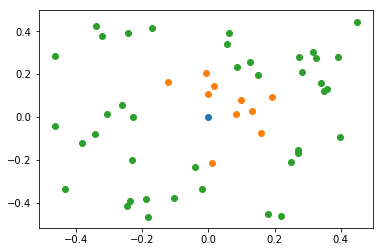

In [65]:
plt.scatter(0,0)
plt.scatter(x[idx_knn], y[idx_knn])
plt.scatter(x[idx_others], y[idx_others])

### (3) 기존 데이터에서 y축의 값을 5배한 다음에 다시 (0,0)의 10 nearest neighbor를 찾으시오. 이 때 거리는 유클리디안 거리를 사용하고 10 nearest neighbor의 python 기준의 index를 쓰시오.

In [66]:
train['y_re'] = train['y']*5

In [67]:
train.head()

,x,y,distance,y_re
0,0.088131,0.234301,0.250327,1.171503
1,0.397714,-0.091357,0.408071,-0.456783
2,0.391531,0.278688,0.480586,1.393440
3,0.315837,0.303971,0.438351,1.519853
4,-0.464110,0.286071,0.545193,1.430357


In [68]:
train['distance_re'] = np.sqrt(x**2+train['y_re']**2)

In [69]:
train.head()

,x,y,distance,y_re,distance_re
0,0.088131,0.234301,0.250327,1.171503,1.174813
1,0.397714,-0.091357,0.408071,-0.456783,0.605662
2,0.391531,0.278688,0.480586,1.393440,1.447401
3,0.315837,0.303971,0.438351,1.519853,1.552323
4,-0.464110,0.286071,0.545193,1.430357,1.503769


In [70]:
train.sort_values('distance_re').index.values[:10]

array([45, 26, 10,  9, 18,  8, 47,  5, 15, 49])

### (4) y축의 값을 5배한 데이터와 (0, 0)에 대한 scatter plot을 그리시오. 이 때 (0,0)은 무작위로 생성한 데이터와 구분되도록 하고, 10 nearest neighbor의 경우에도 nearest neighbor가 아닌 포인트와 구분되도록 scatter plot을 그리시오. (색이나 모양으로 구별) y축의 값을 변경한 후 어떻게 달라졌는지 쓰시오.

In [71]:
idx_knn = train.sort_values('distance_re').index.values[:10]
idx_others = train.sort_values('distance_re').index.values[10:]

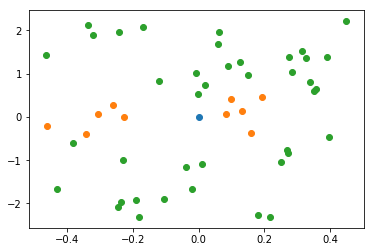

In [72]:
plt.scatter(0,0)
plt.scatter(x[idx_knn], train['y_re'][idx_knn])
plt.scatter(x[idx_others], train['y_re'][idx_others])

## Decision tree

### (1) decision tree를 학습하는 단계에서 overfitting을 막기 위해서 여러 parameter를 이용하는데 어떤 조합이 가장 좋은지 stratified k-fold cross-validation을 이용해서 알아보고자 한다.  변경하고자 하는 옵션은 max_depth, min_samples_split, min_samples_leaf 이고 사용하게 될 값은 다음과 같다. 
- max_depth=[3, 4]
- min_samples_split=[100, 200, 300]
- min_samples_leaf=[50, 100]

### 위의 세 옵션에 대해서 5-fold cross-validation을 정확도를 기준으로 수행한다고 했을 때 아래 표에 각 validation step마다 validation set에 의한 정확도를 채우시오.

In [73]:
data = pd.read_table("./spambase.txt")
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,target
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [74]:
colnames = list(data.columns.values)[:-1]
X = data[colnames]
y = data['target']

In [75]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
idx_train, idx_test = [], []
for train, test in skf.split(X, y) :
    idx_train.append(train)
    idx_test.append(test)

In [76]:
max_depth=[3, 4]
min_samples_split=[100, 200, 300]
min_samples_leaf=[50, 100]
params = [dict(max_depth=d, min_samples_split=s, min_samples_leaf=l) 
          for d in max_depth for s in min_samples_split for l in min_samples_leaf]
params

[{'max_depth': 3, 'min_samples_leaf': 50, 'min_samples_split': 100},
 {'max_depth': 3, 'min_samples_leaf': 100, 'min_samples_split': 100},
 {'max_depth': 3, 'min_samples_leaf': 50, 'min_samples_split': 200},
 {'max_depth': 3, 'min_samples_leaf': 100, 'min_samples_split': 200},
 {'max_depth': 3, 'min_samples_leaf': 50, 'min_samples_split': 300},
 {'max_depth': 3, 'min_samples_leaf': 100, 'min_samples_split': 300},
 {'max_depth': 4, 'min_samples_leaf': 50, 'min_samples_split': 100},
 {'max_depth': 4, 'min_samples_leaf': 100, 'min_samples_split': 100},
 {'max_depth': 4, 'min_samples_leaf': 50, 'min_samples_split': 200},
 {'max_depth': 4, 'min_samples_leaf': 100, 'min_samples_split': 200},
 {'max_depth': 4, 'min_samples_leaf': 50, 'min_samples_split': 300},
 {'max_depth': 4, 'min_samples_leaf': 100, 'min_samples_split': 300}]

In [128]:
from sklearn.tree import DecisionTreeClassifier
result_acc = []
result_kfold = []
for p in params :
    clf = DecisionTreeClassifier(
                            max_depth = p['max_depth'], 
                            min_samples_leaf = p['min_samples_leaf'],
                            min_samples_split = p['min_samples_split']
    )
    tmp_acc = []
    for k in range(len(idx_train)) :
        clf.fit(X.iloc[idx_train[k]], y[idx_train[k]])
        tmp_acc.append(clf.score(X.iloc[idx_test[k]], y[idx_test[k]]))
    result_acc.append([p['max_depth'], p['min_samples_split'], p['min_samples_leaf']]+tmp_acc)
    res = np.array(tmp_acc).mean()
    result_kfold.append([p['max_depth'], p['min_samples_split'], p['min_samples_leaf'], res])
    print(p, res)

{'max_depth': 3, 'min_samples_split': 100, 'min_samples_leaf': 50} 0.865237080857
{'max_depth': 3, 'min_samples_split': 100, 'min_samples_leaf': 100} 0.857414292786
{'max_depth': 3, 'min_samples_split': 200, 'min_samples_leaf': 50} 0.865237080857
{'max_depth': 3, 'min_samples_split': 200, 'min_samples_leaf': 100} 0.857414292786
{'max_depth': 3, 'min_samples_split': 300, 'min_samples_leaf': 50} 0.865237080857
{'max_depth': 3, 'min_samples_split': 300, 'min_samples_leaf': 100} 0.854156963796
{'max_depth': 4, 'min_samples_split': 100, 'min_samples_leaf': 50} 0.878262616095
{'max_depth': 4, 'min_samples_split': 100, 'min_samples_leaf': 100} 0.861517085913
{'max_depth': 4, 'min_samples_split': 200, 'min_samples_leaf': 50} 0.880438894658
{'max_depth': 4, 'min_samples_split': 200, 'min_samples_leaf': 100} 0.861517085913
{'max_depth': 4, 'min_samples_split': 300, 'min_samples_leaf': 50} 0.880003638946
{'max_depth': 4, 'min_samples_split': 300, 'min_samples_leaf': 100} 0.868923521885


In [129]:
from pandas import DataFrame as df
colnames = ['max_depth', 'min_samples_split', 'min_samples_leaf', 'Fold1', 'Fold2', 'Fold3', 'Fold4', 'Fold5']
result_acc = df(result_acc, columns=colnames)
result_acc

,max_depth,min_samples_split,min_samples_leaf,Fold1,Fold2,Fold3,Fold4,Fold5
0,3,100,50,0.850163,0.879479,0.888165,0.914037,0.794342
1,3,100,100,0.836048,0.874050,0.880565,0.902067,0.794342
2,3,200,50,0.850163,0.879479,0.888165,0.914037,0.794342
3,3,200,100,0.836048,0.874050,0.880565,0.902067,0.794342
4,3,300,50,0.850163,0.879479,0.888165,0.914037,0.794342
5,3,300,100,0.825190,0.868621,0.880565,0.902067,0.794342
6,4,100,50,0.892508,0.895765,0.903366,0.898803,0.800871
7,4,100,100,0.878393,0.890337,0.895765,0.894450,0.748640
8,4,200,50,0.892508,0.895765,0.903366,0.906420,0.804135
9,4,200,100,0.878393,0.890337,0.895765,0.894450,0.748640


In [130]:
colnames= colnames[:3] + ['Acc_Fold']
result_kfold = df(result_kfold, columns=colnames)
result_kfold

,max_depth,min_samples_split,min_samples_leaf,Acc_Fold
0,3,100,50,0.865237
1,3,100,100,0.857414
2,3,200,50,0.865237
3,3,200,100,0.857414
4,3,300,50,0.865237
5,3,300,100,0.854157
6,4,100,50,0.878263
7,4,100,100,0.861517
8,4,200,50,0.880439
9,4,200,100,0.861517


### (2) 평균적으로 가장 정확도가 높은 조건으로 전체 데이터를 이용해서 decision tree를 학습하고 그 결과 tree를 그리시오. 

In [131]:
res_df = result_kfold[result_kfold['Acc_Fold']==np.max(result_kfold['Acc_Fold'])]
res_df

,max_depth,min_samples_split,min_samples_leaf,Acc_Fold
8,4,200,50,0.880439


In [132]:
res_param = params[res_df.index.values[0]]
res_param

{'max_depth': 4, 'min_samples_leaf': 50, 'min_samples_split': 200}

In [127]:
clf = DecisionTreeClassifier(
                            max_depth = res_param['max_depth'], 
                            min_samples_leaf = res_param['min_samples_leaf'],
                            min_samples_split = res_param['min_samples_split']
    )
clf.fit(X,y)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=50,
            min_samples_split=200, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

#### Tree Visualization

## Naive Bayes

### (1) sklearn.model_selection.train_test_split을 이용해서 데이터를 train set과 test set (validation set)으로 나누고자 한다. 먼저 주어진 데이터를 불러와 input에 해당하는 X와 output 값만 담고 있는 y 변수를 생성하고 여기서부터 train_test_split를 이용해서 Xtrain, Xtest, ytrain, ytest를 얻으시오. 이 때 test_size=0.2, stratify=y, random_state=150으로 설정하시오. Xtrain에 들어있는 데이터 중 맨 위에 있는 5개 데이터와 Xtest에 들어있는 데이터 중 맨 위에 있는 5개 데이터를 jupyter notebook 화면에 print하시오. 

In [139]:
data = pd.read_csv('./spam_sms.csv')

colnames = list(data.columns.values)[:-1]
X = data[colnames]
y = data['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.32, random_state=150, stratify=y
)
X_train.head()

,alreadi,also,alway,amp,anyth,around,ask,award,babe,back,...,win,wish,word,work,would,www,ya,ye,yeah,year
989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3205,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3923,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
X_test.head()

,alreadi,also,alway,amp,anyth,around,ask,award,babe,back,...,win,wish,word,work,would,www,ya,ye,yeah,year
3881,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
283,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### (2) Multinomial naïve Bayes 모형을 이용해서 세팅이 변경없이 train set으로 학습을 하고 test set을 이용해서 정확도(accuracy), recall, precision, f1 measure 값을 구하시오.

In [145]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn import metrics
res = dict(
    accuracy = metrics.accuracy_score(y_test, y_pred),
    precision = metrics.precision_score(y_test, y_pred),
    recall = metrics.recall_score(y_test, y_pred),
    f1_score = metrics.f1_score(y_test, y_pred)
)
print(res)

{'accuracy': 0.96880733944954134, 'precision': 0.87854251012145745, 'recall': 0.91176470588235292, 'f1_score': 0.89484536082474231}


### (3) 학습된 Multinomial naïve Bayes 모형으로부터 서로 다른 두 group(스팸 SMS와 스팸이 아닌 SMS)일 확률을 높이는데 가장 기여를 많이 하는 단어 상위 10개씩을 찾으시오. 

In [186]:
res_df = df({'feature':X_train.columns.values,
            'log_prob_0' : clf.feature_log_prob_[0],
             'log_prob_1' : clf.feature_log_prob_[1],
             'prob_0' : np.exp(clf.feature_log_prob_[0]),
             'prob_1' : np.exp(clf.feature_log_prob_[1])
            })

In [187]:
res_df.head()

,feature,log_prob_0,log_prob_1,prob_0,prob_1
0,alreadi,-5.230039,-7.453562,0.005353,0.000579
1,also,-5.432563,-7.048097,0.004372,0.000869
2,alway,-5.858647,-8.146709,0.002855,0.000290
3,amp,-5.230039,-8.146709,0.005353,0.000290
4,anyth,-5.246846,-8.146709,0.005264,0.000290


##### class 0

In [188]:
res_df.sort_values('log_prob_0', ascending=False)[['feature', 'log_prob_0', 'prob_0']][:10]

,feature,log_prob_0,prob_0
43,go,-3.634024,0.026410
41,get,-3.763701,0.023198
48,gt,-3.869062,0.020878
76,lt,-3.881965,0.020610
12,call,-3.935311,0.019540
22,come,-4.016115,0.018023
99,ok,-4.021078,0.017934
152,ur,-4.061693,0.017220
75,love,-4.098636,0.016595
27,day,-4.109447,0.016417


##### class 1

In [189]:
res_df.sort_values('log_prob_1', ascending=False)[['feature', 'log_prob_1', 'prob_1']][:10]

,feature,log_prob_1,prob_1
12,call,-2.586027,0.075319
39,free,-3.022745,0.048667
150,txt,-3.248869,0.038818
152,ur,-3.483270,0.030707
139,text,-3.635850,0.026362
86,mobil,-3.635850,0.026362
134,stop,-3.704058,0.024623
114,repli,-3.815976,0.022016
170,www,-3.815976,0.022016
18,claim,-3.842644,0.021437


#### DataFrmae을 사용하지 않고 찾는 방법
[numpy.argsort](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html) 사용, 이때 값 구성에 차이가 다소 있음.


In [199]:
print("Class 0: {}".format(X_train.columns.values[np.argsort(clf.feature_log_prob_[0])[-10:][::-1]]))
print("Class 1: {}".format(X_train.columns.values[np.argsort(clf.feature_log_prob_[1])[-10:][::-1]]))

Class 0: ['go' 'get' 'call' 'come' 'ok' 'gt' 'lt' 'know' 'day' 'good']
Class 1: ['call' 'free' 'txt' 'mobil' 'ur' 'text' 'www' 'repli' 'claim' 'stop']


### (4) 학습된 Multinomial naïve Bayes 모형에서 서로 다른 두 group에 대해서 개별 단어의 $p_i  (i=\{1,…,175\})$ 값들의 히스토그램을 그리시오. 이 때 히스토그램을 그리기 위한 막대의 수는 30으로 하시오. 

(array([ 16.,   9.,   7.,  33.,  24.,  23.,  10.,  10.,   9.,   9.,   6.,
          0.,   3.,   0.,   0.,   1.,   4.,   0.,   3.,   1.,   2.,   0.,
          1.,   2.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([ 1.00008923,  1.0009783 ,  1.00186738,  1.00275646,  1.00364553,
         1.00453461,  1.00542369,  1.00631276,  1.00720184,  1.00809092,
         1.00898   ,  1.00986907,  1.01075815,  1.01164723,  1.0125363 ,
         1.01342538,  1.01431446,  1.01520353,  1.01609261,  1.01698169,
         1.01787076,  1.01875984,  1.01964892,  1.020538  ,  1.02142707,
         1.02231615,  1.02320523,  1.0240943 ,  1.02498338,  1.02587246,
         1.02676153]),
 <a list of 30 Patch objects>)

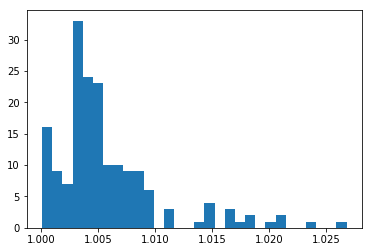

In [190]:
plt.hist(np.exp(res_df['prob_0']), bins=30)

(array([ 101.,   21.,   12.,   10.,    6.,    9.,    4.,    2.,    3.,
           1.,    2.,    1.,    0.,    0.,    0.,    1.,    0.,    0.,
           0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    1.]),
 array([ 1.00028973,  1.00288766,  1.00548559,  1.00808352,  1.01068146,
         1.01327939,  1.01587732,  1.01847525,  1.02107318,  1.02367111,
         1.02626905,  1.02886698,  1.03146491,  1.03406284,  1.03666077,
         1.0392587 ,  1.04185664,  1.04445457,  1.0470525 ,  1.04965043,
         1.05224836,  1.05484629,  1.05744423,  1.06004216,  1.06264009,
         1.06523802,  1.06783595,  1.07043388,  1.07303182,  1.07562975,
         1.07822768]),
 <a list of 30 Patch objects>)

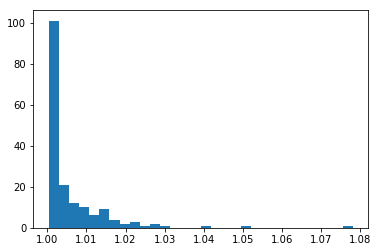

In [191]:
plt.hist(np.exp(res_df['prob_1']), bins=30)

### (5) Bernoulli naïve Bayes 모형을 이용해서 세팅 변경 없이 train set으로 학습을 하고 test set을 이용해서 정확도(accuracy), recall, precision, f1 measure 값을 구하시오. (2)의 결과와 비교하여 어느 쪽이 더 나은 모형인지 설명하시오. 이 결과로부터 알 수 있는 사실은 무엇인가?

In [192]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn import metrics
res = dict(
    accuracy = metrics.accuracy_score(y_test, y_pred),
    precision = metrics.precision_score(y_test, y_pred),
    recall = metrics.recall_score(y_test, y_pred),
    f1_score = metrics.f1_score(y_test, y_pred)
)
print(res)

{'accuracy': 0.97675840978593276, 'precision': 0.94247787610619471, 'recall': 0.89495798319327735, 'f1_score': 0.91810344827586199}
